In [112]:
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
plt.style.use('dark_background')


In [113]:
def invertion(x):
    matrix=[]
    X = torch.tensor(x[1,:])
    Y = torch.tensor(x[0,:])
    i=0
    while i < len(X) - 2:   
        row = [0] * len(X)
        row[i] = -1       
        row[i+1] = 2       
        row[i+2] = -1     
        matrix.append(row)
        i += 1

    res = X*torch.tensor(matrix)
    ans = res.sum(dim=1)
    inver = sum([i<0 for i in ans])

    return inver
    
invertion_transform = FunctionTransformer(func=invertion,validate=True)
# x = np.array([
#     [10,20,30,40,50,60],
#     [1,2,3,4,5,6],
#     ])
x = np.array([
    [0,10,-10,11,15,34,-3],
    [0,1,2,3,4,5,6]
    ])
ans = invertion_transform.transform(x)
print(ans)

tensor(0)


calcuating invetions in inflation data set 


In [114]:
file = "./data/infaltion.csv"
df = pd.read_csv(file,sep=',',header=0)
df = df.sort_values('Year')


NameError: name 'country' is not defined

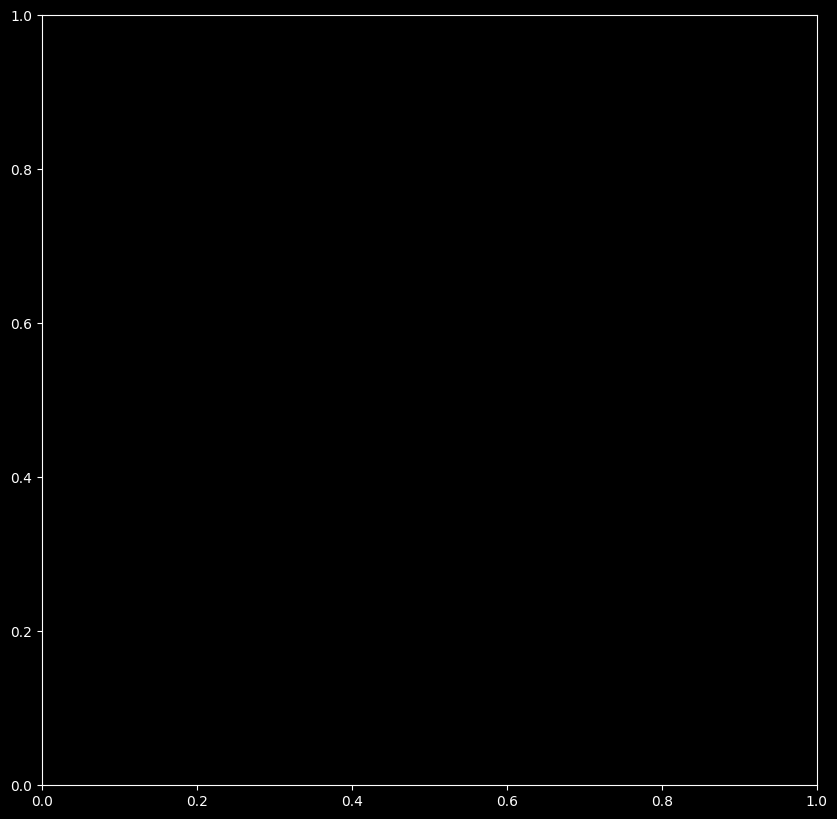

In [115]:
data = df[df.Code=='USA']

X = data.iloc[:,-2].values
Y = data.iloc[:,-1].values

fig,one = plt.subplots(1,1,figsize=(10,10))
index = range(len(X))
one.set_title(f'Inflation graph ({country})')
one.set_ylabel('Consumer Price Index')
one.set_xlabel('Year')
one.plot(X,Y,marker="*")

invertion_transform = FunctionTransformer(func=invertion,validate=True)
datamatrix = []
datamatrix.append(Y)
datamatrix.append(X)
result = invertion_transform.transform(datamatrix)
print(f'number of invertions {result}')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def analyze_csv(path, x_col, y_col):
    # Load data
    df = pd.read_csv(path)
    df = df.sort_values(x_col)

    # x = df[x_col].values
    # y = df[y_col].values
    y = [10,20,11,40,50,23]
    x = [0,1,2,3,4,5]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker="o")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs {x_col}")
    plt.show()

    # --- Analysis ---
    diffs = np.diff(y)   # changes between points
    trend = np.sign(diffs)

    # Basic analysis
    if np.all(trend >= 0):
        return "The graph is strictly increasing."
    elif np.all(trend <= 0):
        return "The graph is strictly decreasing."
    else:
        # Count direction changes
        changes = np.sum(trend[1:] != trend[:-1])
        if changes == 0:
            return "The graph is mostly flat."
        elif changes < len(trend) * 0.2:
            return f"The graph has {changes} direction changes, mostly monotonic with some fluctuations."
        else:
            return f"The graph is wiggly with {changes} ups and downs."


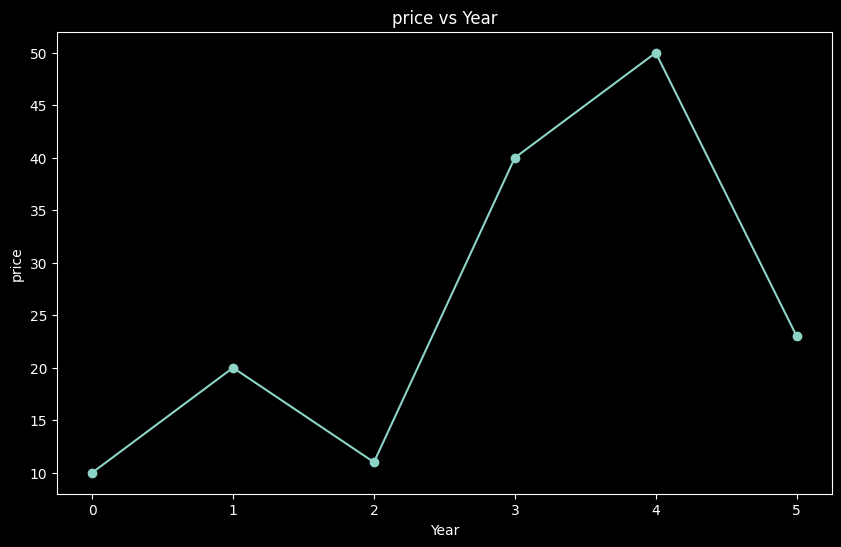

The graph is wiggly with 3 ups and downs.


In [ ]:
result = analyze_csv("./data/infaltion.csv", "Year", "price")
print(result)

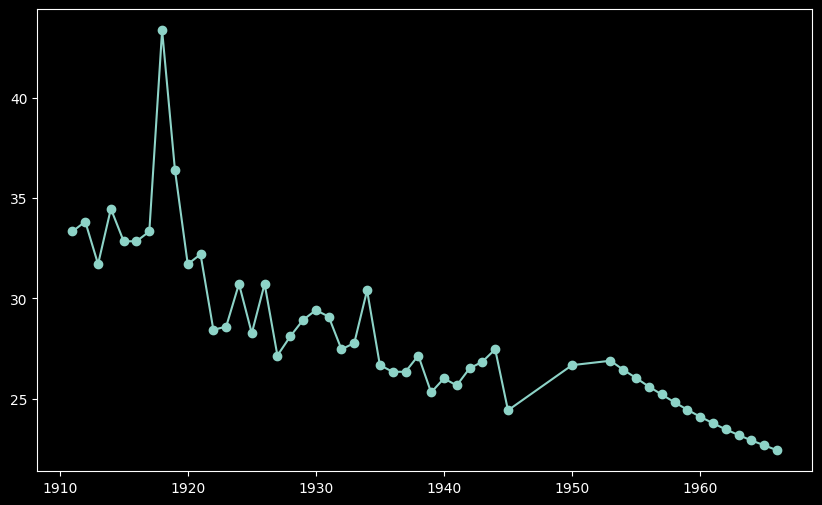

tensor(1)


In [ ]:
datamatrix = []
data = pd.read_csv('./data/child-mortality.csv')
country = 'IND'
data = data[data.iloc[:,1]==country]
X = data.iloc[:50,-2]
Y = data.iloc[:50,-1]
datamatrix.append(Y)
datamatrix.append(X)

plt.figure(figsize=(10, 6))
plt.plot(X, Y, marker="o")
# plt.xlabel(x_col)
# plt.ylabel(y_col)
# plt.title(f"{y_col} vs {x_col}")
plt.show()


res = invertion_transform.transform(datamatrix)
print(res)

In [ ]:
import pandas as pd
data = pd.read_csv('./data/Histogram (1).csv')
temp = {
    'id':[i for i in range(0,10)],
    'values':[]
}
print(temp['id'])
for i in range(0,10):
    temp['values'].append(data.iloc[index:index+1000,1])

pd.DataFrame(temp)
    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


,id,values
0,0,0 0.045652 1 0.006521 2 0.01304...
1,1,0 0.045652 1 0.006521 2 0.01304...
2,2,0 0.045652 1 0.006521 2 0.01304...
3,3,0 0.045652 1 0.006521 2 0.01304...
4,4,0 0.045652 1 0.006521 2 0.01304...
5,5,0 0.045652 1 0.006521 2 0.01304...
6,6,0 0.045652 1 0.006521 2 0.01304...
7,7,0 0.045652 1 0.006521 2 0.01304...
8,8,0 0.045652 1 0.006521 2 0.01304...
9,9,0 0.045652 1 0.006521 2 0.01304...


In [ ]:
import pandas as pd

data = pd.read_csv('./data/infaltion.csv')
data = data.dropna()
total_rows = 1000
chunk_size = total_rows // 10
new_data = {}

for i in range(10):
    start_index = i * chunk_size
    if i == 9:
        end_index = total_rows
    else:
        end_index = start_index + chunk_size
    
    chunk = data.iloc[start_index:end_index, -1].reset_index(drop=True)
    
    new_data[f'part_{i}'] = chunk

df_parts = pd.DataFrame(new_data)

print(df_parts)
df_parts.to_csv('split_column.csv', index=False)



       part_0     part_1     part_2     part_3     part_4     part_5  \
0    7.960458  21.270798   8.168574   3.108394  19.842285  29.477642   
1   17.824167  21.425669  19.786049   0.003755   5.692820   2.050464   
2   15.596081   0.013112  16.315220   0.153133  12.299427   3.363222   
3    0.000022  10.118110   0.000025  62.702343   0.075307   4.262675   
4   10.713301   0.155210  13.634687   5.942722  10.973489   1.612868   
..        ...        ...        ...        ...        ...        ...   
95   4.232895   2.401541   1.183042   3.021433   1.413770  12.218114   
96   0.120694   0.000058   1.780619   0.014148   2.300629  30.691107   
97  19.991104   6.761889   1.002340  12.099125   8.404230   1.625598   
98   0.759457  13.872615   1.727012   0.174100   4.148572   0.120814   
99  17.171501   0.000005   0.065009   3.221035  20.901010  12.262084   

       part_6     part_7        part_8        part_9  
0    9.353013   7.236885  1.606792e-01  1.542813e+01  
1    2.719799  20.168644 

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('dark_background')



In [126]:
df = pd.read_csv('./data/infaltion.csv')
df = df[df.iloc[:,1]=='BFA']
# df = df[df.iloc[:,1]=='IND']
df_data = df


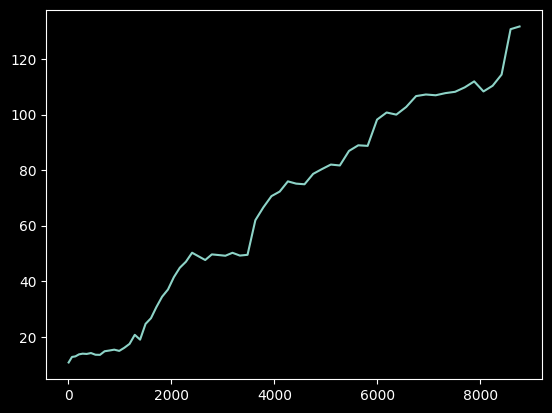

In [ ]:
plt.plot(df.iloc[:100,-1])

In [127]:
# df = np.array([10, 0, 10, 20, 40, 00])
data = df.iloc[:,-1]
I = np.eye(len(data))
two = np.full((len(data),),2)
one = np.full((len(data)-1,),-1)
matrix = np.diag(two)+np.diag(one,1)+np.diag(one,-1)
matrix = matrix[1:-1]
matrix

array([[-1,  2, -1, ...,  0,  0,  0],
       [ 0, -1,  2, ...,  0,  0,  0],
       [ 0,  0, -1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., -1,  0,  0],
       [ 0,  0,  0, ...,  2, -1,  0],
       [ 0,  0,  0, ..., -1,  2, -1]], shape=(62, 64))

In [129]:
vector = np.dot(matrix,data)
norm = np.linalg.norm(vector)
norm

np.float64(33.384518408867535)

In [130]:
np.sum(vector<0)

np.int64(29)

In [133]:
index = np.where(vector<0)[0]
index


array([ 1,  4,  6,  7,  9, 11, 12, 13, 15, 17, 20, 23, 26, 29, 31, 32, 36,
       38, 39, 43, 46, 49, 50, 53, 55, 56, 58, 59, 60])

In [132]:
df_data.iloc[index]

,Entity,Code,Year,price
69,Burkina Faso,BFA,1961,12.701919
276,Burkina Faso,BFA,1964,13.886264
438,Burkina Faso,BFA,1966,14.110748
525,Burkina Faso,BFA,1967,13.499223
703,Burkina Faso,BFA,1969,14.760203
890,Burkina Faso,BFA,1971,15.331476
987,Burkina Faso,BFA,1972,14.883283
1086,Burkina Faso,BFA,1973,16.014992
1289,Burkina Faso,BFA,1975,20.677290
1498,Burkina Faso,BFA,1977,24.619692
